# Load Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import researchpy as rp
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from jupyterthemes import jtplot
jtplot.style(theme="grade3")

# Load Data

In [2]:
root_path = './data/s1_p1_open/'
file_name_prefix = 'lat_rel_1p_1s_stamped'
dataSize = ['10b_', '100b_', '1kb_', '10kb_', '100kb_', '250kb_', '1mb_']
transFreq = ['5hz_', '10hz_', '20hz_', '50hz_', '100hz_', '1000hz_']
expNum = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
file_name_suffix = '.csv' 

In [3]:
data_rec = np.zeros([len(dataSize), len(transFreq), len(expNum)])
data_late = np.zeros([len(dataSize), len(transFreq), len(expNum)])
data_toolate = np.zeros([len(dataSize), len(transFreq), len(expNum)])
data_loss = np.zeros([len(dataSize), len(transFreq), len(expNum)])

In [4]:
for i in range(len(dataSize)):
    for j in range(len(transFreq)):
        for k in range(len(expNum)):
            temp = root_path + file_name_prefix + dataSize[i] + transFreq[j] + expNum[k] + file_name_suffix
            data_rec[i,j,k] = np.loadtxt(temp, skiprows=1, usecols=3, dtype=int)
            data_late[i,j,k] = np.loadtxt(temp, skiprows=1, usecols=4, dtype=int)
            data_toolate[i,j,k] = np.loadtxt(temp, skiprows=1, usecols=5, dtype=int)
            data_loss[i,j,k] = np.loadtxt(temp, skiprows=1, usecols=6, dtype=int)

# Reliability and Late-Rate

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
mean_rec = np.mean(data_rec, axis=2)/1000

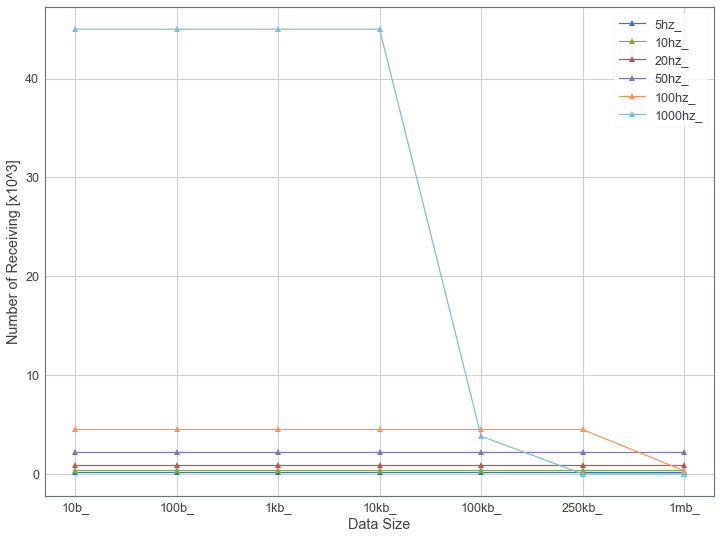

In [7]:
plt.figure(figsize=(12,9))
xs = np.arange(1,len(mean_rec)+1, 1)
for i in range(len(transFreq)):
    plt.plot(xs, mean_rec[:,i], '-^')
plt.xticks(xs, dataSize)
plt.legend(transFreq)
plt.xlabel("Data Size")
plt.ylabel("Number of Receiving [x10^3]")
plt.savefig("./figures/numRec_opensplice.pdf", dpi=1600)
plt.show()

In [8]:
mean_late = 100 * np.mean(data_late/data_rec, axis=2)
mean_toolate = 100 * np.mean(data_toolate/data_rec, axis=2)
mean_loss = np.mean(data_loss/(data_loss+data_rec), axis=2)

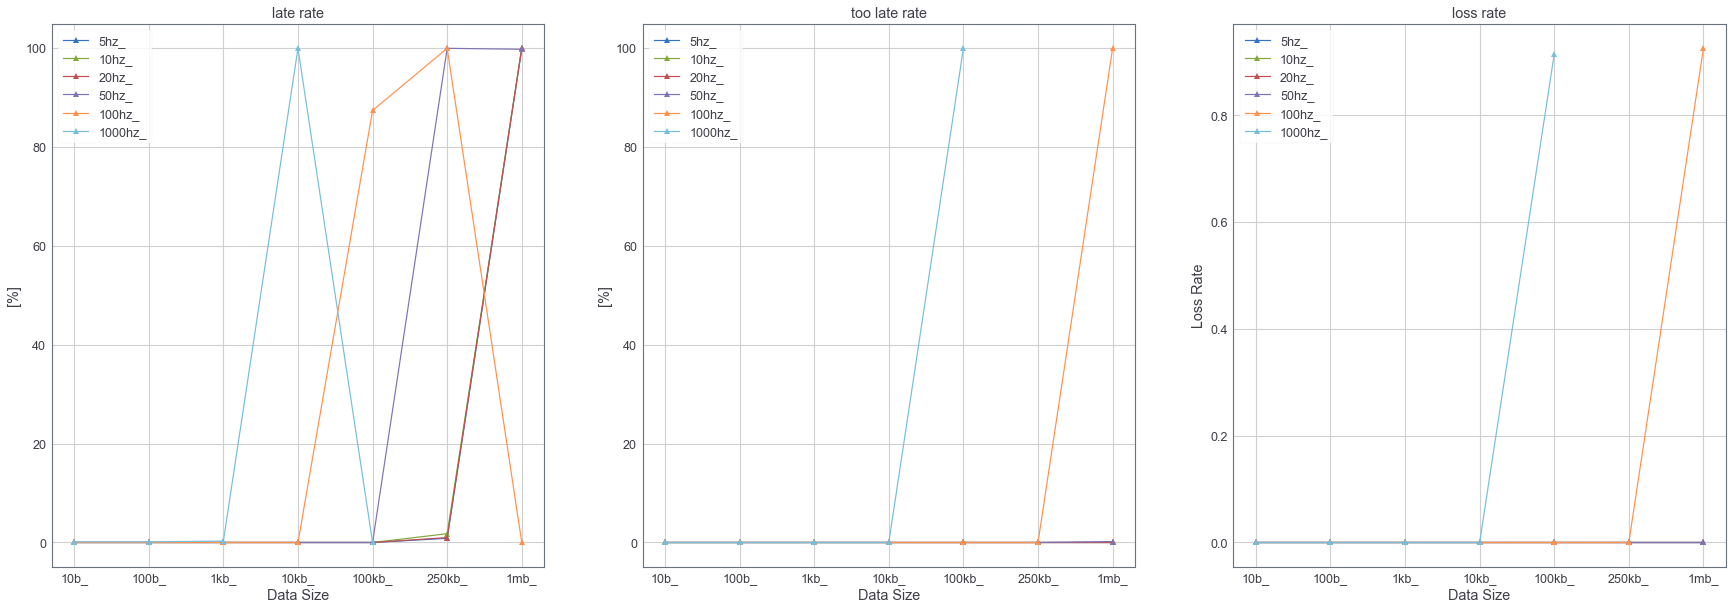

In [9]:
plt.figure(figsize=(30,10))
xs = np.arange(1,len(mean_rec)+1, 1)
plt.subplot(131)
for i in range(len(transFreq)):
    plt.plot(xs, mean_late[:,i], '-^')
plt.xticks(xs, dataSize)
plt.legend(transFreq)
plt.xlabel("Data Size")
plt.ylabel("[%]")
plt.title("late rate")
plt.subplot(132)
for i in range(len(transFreq)):
    plt.plot(xs, mean_toolate[:,i], '-^')
plt.xticks(xs, dataSize)
plt.legend(transFreq)
plt.xlabel("Data Size")
plt.ylabel("[%]")
plt.title("too late rate")
plt.subplot(133)
for i in range(len(transFreq)):
    plt.plot(xs, mean_loss[:,i], '-^')
plt.xticks(xs, dataSize)
plt.legend(transFreq)
plt.xlabel("Data Size")
plt.ylabel("Loss Rate")
plt.title("loss rate")
plt.savefig("./figures/reliability_opensplice.pdf", dpi=1600)
plt.show()

In [10]:
mean_loss[:,-1]

array([0.        , 0.        , 0.        , 0.        , 0.91483792,
              nan,        nan])

In [11]:
mean_toolate[:,-1]

array([4.44454321e-04, 4.44449383e-04, 2.22227161e-04, 6.66666667e-04,
       1.00000000e+02,            nan,            nan])